<a href="https://colab.research.google.com/github/emmanueltiti/week-9-IP/blob/main/IP_week_9_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: K-nearest neighbor (kNN) classifier - Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> We are creating kNN agorithim with the provided dataset and triying different split percentages to observe the changes.

### b) Defining the Metric for Success

Our metric scores will be the accuracy score  (percentage of correct classification) that will be compared between the different splits results to determine which split is best for use.

### c) Understanding the context 

We are requred to create  a KNN model with the best k value and absereve the performance across different train, test splits.

### e) Data Relevance
The data we have hass all the variables essential to create the models.

## 2. Reading the Data

In [6]:
#Iporting necesarry libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [7]:
#data set 1
data1=pd.read_csv('train (5).csv')
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




## 3. Checking the Data

In [8]:
# Determining the no. of records in our dataset
#
data1.shape

(891, 12)

In [9]:
# Previewing the top of our dataset
#
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Previewing the bottom of our dataset
# 
data1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
# Checking whether each column has an appropriate datatype
# 
data1.dtypes
#all data types seem to be in check
#we could change the survived column into  object data type forthe purpose of bivarfiate analysis

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
#we could change the survived column into  object data type forthe purpose of bivarfiate analysis
data1['Survived']=data1['Survived'].astype('object')
data1['Pclass']=data1['Pclass'].astype('object')
data1.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
#cheking for important math components in our numrical variables
data1.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


## 5. Tidying the Dataset

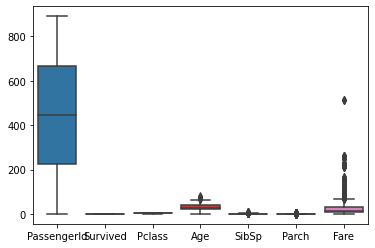

In [14]:
# Checking for Outliers
#we can use box plots 
sns.boxplot(data=data1)

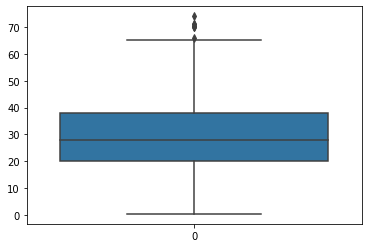

In [15]:
# Checking for Anomalies for age
#
#sns.boxplot(data=data1['Age'])
#the age column seems to contain anormalies ,values greater than 65 years but from research the oldest passanger on the titanic was 74 years old
#so we could drop rows containing idnividuals older than 74
data1.drop(data1[data1['Age'] >74].index, inplace = True)
sns.boxplot(data=data1['Age'])

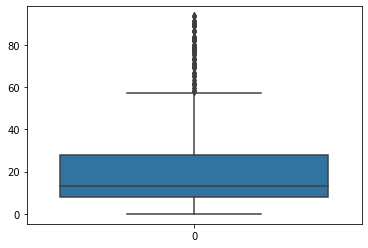

In [16]:
#sns.boxplot(data=data1['Fare'])
data1.drop(data1[data1['Fare'] >100].index, inplace = True)
sns.boxplot(data=data1['Fare'])

In [17]:
data1.shape

(837, 12)

In [18]:
# Identifying the Missing Data
#
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            172
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          677
Embarked         2
dtype: int64

In [19]:
# Dealing with the Missing Data
#we will foward fill the missing data in the age column and embarked column 
#we drop the the cabin column since it has more than 70% is its values null
data1["Age"].fillna( method ='ffill',  inplace = True)
data1["Embarked"].fillna( method ='ffill', limit = 2, inplace = True)
data1.drop(['Cabin'],axis=1,inplace=True)
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 6. Exploratory Analysis

Bivariate Analysis

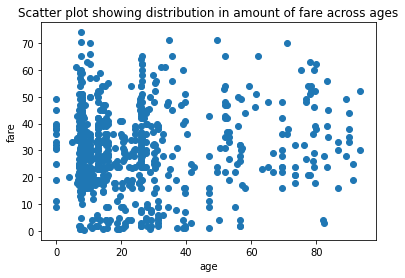

In [20]:
# Ploting the bivariate summaries and recording our observations
#A scatter plot would show thw distribution on of age againt survival
fig, ax = plt.subplots()
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Scatter plot showing distribution in amount of fare across ages')
ax.scatter(data1['Fare'],data1['Age'])



The results show an almost even distribution interms of the fare paid

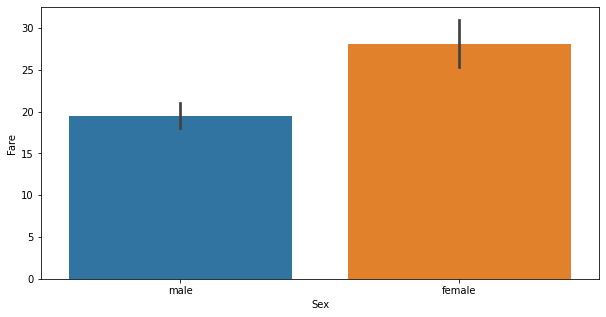

In [21]:
##We plot a bar graph 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
sns.barplot(x='Sex',y='Fare',data=data1) 

In [22]:

#the code below should give the coeficients of correlation between our variable
#negative coefficienta represent an inverse relation btn the variable  
coef=data1.corr()
coef

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.022735,-0.052417,-0.001652,-0.002172
Age,0.022735,1.000000,-0.210927,-0.179670,0.108600
SibSp,-0.052417,-0.210927,1.000000,0.418869,0.342799
Parch,-0.001652,-0.179670,0.418869,1.000000,0.225808
Fare,-0.002172,0.108600,0.342799,0.225808,1.000000


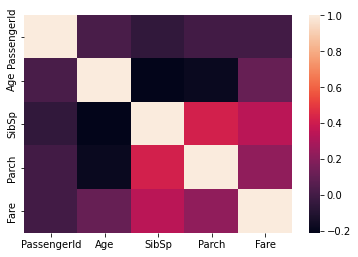

In [23]:
#here we visualise the data frol our coefficients
ax = sns.heatmap(coef)

Data reduction

We use PCA as our method of choice ,it will help reduce our variables to the most important ones only.

In [24]:
# Data Reduction
#we can start by droping the name and ticket column as it is insignificant in our purpose
del data1['Name']
del data1['Ticket']
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [25]:
#we encode the sex 
encode=LabelEncoder()
data1['Sex']=encode.fit_transform(data1['Sex'])
data1['Embarked']=encode.fit_transform(data1['Embarked'])

In [26]:
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [27]:
#we change all data types
data1['Survived']=data1['Survived'].astype('int')
data1['Pclass']=data1['Pclass'].astype('int')
data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [28]:
#we firstly scale our data  to have 0 mean and a standard deviation of 1 overally
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data1)

StandardScaler()

In [29]:
scaled_data=scaler.transform(data1)
scaled_data

array([[-1.70839434, -0.75132282,  0.76730507, ..., -0.44651977,
        -0.72760943,  0.56195887],
       [-1.70454686,  1.33098579, -1.7611766 , ..., -0.44651977,
         2.34713563, -2.06574825],
       [-1.70069939,  1.33098579,  0.76730507, ..., -0.44651977,
        -0.69519734,  0.56195887],
       ...,
       [ 1.7081645 , -0.75132282,  0.76730507, ...,  2.10458636,
         0.05028067,  0.56195887],
       [ 1.71201198,  1.33098579, -1.7611766 , ..., -0.44651977,
         0.36479796, -2.06574825],
       [ 1.71585945, -0.75132282,  0.76730507, ..., -0.44651977,
        -0.70360047, -0.75189469]])

We can now start by scaling our data as we prepare to perform PCA

In [30]:
pca=PCA(n_components=4)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
scaled_data.shape

(837, 9)

In [31]:
x_pca.shape

(837, 4)

Text(0, 0.5, 'Second principle component')

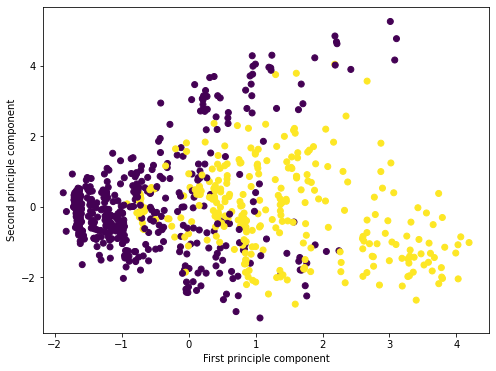

In [32]:
#preview of plot of the first 2 important variables
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data1['Survived'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

## 7. Implementing the Solution

having found our four requred x variable ,we can now create the kNN model

In [33]:
# Implementing the Solution
#x_pca is our x variable
X=x_pca
y=data1['Survived']

In [34]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [37]:
# Evaluating the Algorithm
# --- 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[108   2]
 [  9  49]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       110
           1       0.96      0.84      0.90        58

    accuracy                           0.93       168
   macro avg       0.94      0.91      0.93       168
weighted avg       0.94      0.93      0.93       168



80-20 split has an accuracy of 93%  meaning our model performs well in ptedictions. 

70-30 split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [39]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))



[[152  14]
 [  7  79]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       166
           1       0.85      0.92      0.88        86

    accuracy                           0.92       252
   macro avg       0.90      0.92      0.91       252
weighted avg       0.92      0.92      0.92       252



70-30 split has an acuracy of 92% slightly lower than the previous one.Meaning it performs slightly lower than 80-20 split.

60-40 split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [49]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))



[[207  14]
 [  8 106]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       221
           1       0.88      0.93      0.91       114

    accuracy                           0.93       335
   macro avg       0.92      0.93      0.93       335
weighted avg       0.94      0.93      0.93       335



60-40 performs similar to the 80-20 split.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [68]:
# Reviewing the Solution 
#
classifier = KNeighborsClassifier(n_neighbors=200)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [67]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[217   4]
 [ 14 100]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       221
           1       0.96      0.88      0.92       114

    accuracy                           0.95       335
   macro avg       0.95      0.93      0.94       335
weighted avg       0.95      0.95      0.95       335



Increasing the k value increases  the acuracy score but also increases chanses oc missclasification.

## 9. Follow up questions

### a). Did we have the right data?

The given data set had all the essential variable for creatin our models.

### b). Do we need other data to answer our question?

All our questions were answered by the dataset provided.

**Conclusion**

There is no distinct pattern or difference in the perfomance of the model in the different splits created.